In [1]:
import env
import acquire
import prepare_bootcamp_readme
import requests as req
import pandas as pd
import utilities as utils
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bootcamp_readme_df = pd.read_csv(env.data_path + "coding_bootcamp_readme.csv")

In [3]:
bootcamp_readme_df = prepare_bootcamp_readme.prepare_bootcamp_readme_df(bootcamp_readme_df)

NaN values
     rows  columns
0       4        1
1      15        1
2      17        2
3      19        1
4      23        1
..    ...      ...
269   983        1
270   987        1
271   989        1
272   990        1
273   993        1

[274 rows x 2 columns]
--------------------------------
Empty values
   rows  columns
0   514        2
1   565        2
2   635        2
--------------------------------


## Explore

In [4]:
bootcamp_readme_df.language.value_counts()

JavaScript                 184
Jupyter Notebook           157
HTML                        99
Python                      73
Java                        37
C#                          24
Shell                       23
CSS                         14
TypeScript                  13
Ruby                         9
PHP                          9
C                            8
TeX                          8
Kotlin                       7
C++                          6
Clojure                      5
Scala                        5
HCL                          5
PowerShell                   5
Objective-C                  4
Go                           4
R                            4
Makefile                     3
Dockerfile                   3
Processing                   2
Dart                         2
Swift                        2
Groovy                       2
FORTRAN                      1
Cuda                         1
Vue                          1
OCaml                        1
SWIG    

Web development languages seem to dominate repositores (Javascript, Java, HTML) with data science languages coming in second (Jupyter notebook and Python).

In [5]:
languages_df = pd.concat([bootcamp_readme_df.language.value_counts(), bootcamp_readme_df.language.value_counts(normalize=True)], axis=1)
languages_df.columns = ['count', 'percent']

In [6]:
print(f"Combined % of top 3 web dev languages:  {round(languages_df.loc[['JavaScript', 'HTML', 'Java']].percent.sum(), 4)}")
print(f"Combined % of top 2 data science languages:  {round(languages_df.loc[['Jupyter Notebook', 'Python']].percent.sum(), 4)}")

Combined % of top 3 web dev languages:  0.4372
Combined % of top 2 data science languages:  0.3142


In [12]:
# The dictionary entry for a language will hold the list of unique words in all the readme files
readme_words_by_language_dict = {}

for language in languages_df.index:
    all_readme_for_language = " ".join(bootcamp_readme_df[bootcamp_readme_df.language == language].readme_contents)
    
    readme_words_by_language_dict[language] = re.sub(r"[^\w\s]", "", all_readme_for_language).split()    

In [13]:
# Count the occurences of the words for each language
word_count_by_lanugage_dict = {}

for language in languages_dict.keys():
    word_count_by_lanugage_dict[language] = pd.Series(languages_dict[language]).value_counts()

In [14]:
# Make an entry in each dictionary for 'all_languages'
all_readme_text = " ".join(bootcamp_readme_df.readme_contents)

languages_dict['all_languages'] = re.sub(r"[^\w\s]", "", all_readme_text).split()

word_count_by_lanugage_dict['all_languages'] = pd.Series(languages_dict['all_languages']).value_counts()

In [17]:
word_counts_df = pd.concat(word_count_by_lanugage_dict.values(), axis=1, sort=False)\
.set_axis(word_count_by_lanugage_dict.keys(), axis=1, inplace=False)\
.fillna(0).apply(lambda s : s.astype(int))

In [28]:
word_counts_df.sort_values(by='all_languages', ascending=False).head(10)

,JavaScript,Jupyter Notebook,HTML,Python,Java,C#,Shell,CSS,TypeScript,Ruby,...,GCC Machine Description,Jinja,AutoHotkey,ooc,Matlab,SCSS,Rouge,Lasso,Arduino,all_languages
de,599,196,99,69,40,20,0,14,25,0,...,0,0,0,0,0,0,0,0,0,1178
bootcamp,207,287,143,141,32,61,57,24,17,42,...,0,1,1,0,5,1,3,0,4,1135
9,159,267,91,452,58,8,7,2,2,0,...,0,0,0,0,0,0,0,1,0,1121
1,299,159,128,95,75,60,27,12,32,3,...,1,0,8,0,3,0,0,1,0,1018
data,88,400,199,120,20,10,40,13,2,0,...,0,0,0,0,3,1,0,3,0,955
python,9,589,23,282,0,0,9,3,0,0,...,0,0,0,0,1,0,0,9,0,935
code,249,131,96,108,20,19,18,4,48,21,...,0,0,1,0,2,1,0,5,3,834
2,206,153,114,73,45,41,13,11,31,3,...,1,0,7,0,2,0,0,2,0,764
use,246,121,60,96,18,52,7,4,26,20,...,0,0,1,0,0,6,0,5,1,731
file,141,77,130,123,16,20,34,6,13,96,...,0,0,6,0,0,0,0,0,0,731


The top 10 words in README files for all languages are:  
1. de
1. bootcamp
1. 9
1. 1
1. data
1. python
1. code
1. 2
1. use
1. file

* Are there any words that identify web dev languages from data science languages?

In [34]:
not_js_in_python = word_counts_df[word_counts_df.JavaScript == 0].sort_values(by='Python').tail(10)
not_js_in_jupyter = word_counts_df[word_counts_df.JavaScript == 0].sort_values(by='Jupyter Notebook').tail(10)

In [36]:
not_java_in_python = word_counts_df[word_counts_df.Java == 0].sort_values(by='Python').tail(10)
not_java_in_jupyter = word_counts_df[word_counts_df.Java == 0].sort_values(by='Jupyter Notebook').tail(10)

In [37]:
not_html_in_python = word_counts_df[word_counts_df.HTML == 0].sort_values(by='Python').tail(10)
not_html_in_jupyter = word_counts_df[word_counts_df.HTML == 0].sort_values(by='Jupyter Notebook').tail(10)

In [38]:
data_sci_words_df = pd.concat([not_html_in_jupyter, not_html_in_python, not_java_in_jupyter, not_java_in_python, not_js_in_jupyter,\
                               not_js_in_python])

In [41]:
# Words usually found in data science README files, but not in web dev
data_sci_words_df.index.unique()

Index(['selecione', 'dynamic', 'kln', 'wget', 'conda', 'computational', 'cell',
       'tensorflow', 'jezyku', 'x', 'car', 'ile', 'milvus', 'veri', 'bu', 'la',
       'olarak', 'django', 'reward', 'bir', 'panda', 'neural', 'w', 'analysis',
       'university', 'science', 'jupyter', 'notebook', 'python', 'heroku',
       'track', 'module', 'print', 'function', 'visualization', 'anaconda',
       'def', 'pycharm', 'steering', 'selenium', 'deepracer', 'race', 'agent'],
      dtype='object')

In [ ]:
not_python_in_js = word_counts_df[word_counts_df.Python == 0].sort_values(by='JavaScript').tail(10)
not_jupyter_in_js = word_counts_df[word_counts_df['Jupyter Notebook'] == 0].sort_values(by='JavaScript').tail(10)

In [45]:
not_python_in_java = word_counts_df[word_counts_df.Python == 0].sort_values(by='Java').tail(10)
not_jupyter_in_java = word_counts_df[word_counts_df['Jupyter Notebook'] == 0].sort_values(by='Java').tail(10)

In [46]:
not_python_in_html = word_counts_df[word_counts_df.Python == 0].sort_values(by='HTML').tail(10)
not_jupyter_in_html = word_counts_df[word_counts_df['Jupyter Notebook'] == 0].sort_values(by='HTML').tail(10)

In [47]:
web_dev_words_df = pd.concat([not_jupyter_in_html, not_jupyter_in_java, not_jupyter_in_js, not_python_in_html, not_python_in_java, not_python_in_js])

In [48]:
web_dev_words_df.index.unique()

Index(['id', '25transparent', '50rgba25525525515', 'cosmos', 'var', 'li',
       'signalr', 'cs', 'flight', '1px', 'pacote', 'robolectric', 'odev',
       'cordapp', 'genymotion', 'treasure', 'expense', 'layout', 'checkpoint',
       'android', 'width100px', 'altbr', 'h3', 'hr', 'td', 'yarn', 'nodejs',
       'npm', 'columbia', 'com', 'rstudio', 'azure', 'criacao', 'intent',
       'spring', 'aula', 'uma', 'desafio', 'na', 'em', 'projeto', 'um',
       'react'],
      dtype='object')

In [52]:
word_counts_df['web_dev_languages'] = word_counts_df.Java + word_counts_df.HTML + word_counts_df.JavaScript

In [53]:
word_counts_df['data_sci_languages'] = word_counts_df['Jupyter Notebook'] + word_counts_df['Python']

In [55]:
word_counts_df['other_languages'] = word_counts_df.all_languages - word_counts_df.data_sci_languages - word_counts_df.web_dev_languages

In [56]:
word_counts_df

,JavaScript,Jupyter Notebook,HTML,Python,Java,C#,Shell,CSS,TypeScript,Ruby,...,ooc,Matlab,SCSS,Rouge,Lasso,Arduino,all_languages,web_dev_languages,data_sci_languages,other_languages
de,599,196,99,69,40,20,0,14,25,0,...,0,0,0,0,0,0,1178,738,265,175
e,342,123,74,33,21,6,0,6,19,1,...,0,0,0,0,0,0,692,437,156,99
1,299,159,128,95,75,60,27,12,32,3,...,0,3,0,0,1,0,1018,502,254,262
javascript,267,1,51,3,1,0,0,17,17,13,...,0,0,0,0,0,0,378,319,4,55
code,249,131,96,108,20,19,18,4,48,21,...,0,2,1,0,5,3,834,365,239,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nunchuck,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
wii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
novice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
assam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


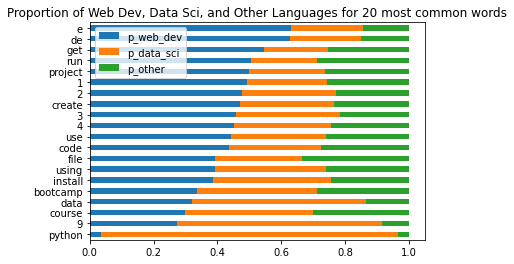

In [81]:
(word_counts_df.assign(p_web_dev=word_counts_df.web_dev_languages / word_counts_df.all_languages, \
                      p_data_sci=word_counts_df.data_sci_languages / word_counts_df.all_languages, \
                     p_other=word_counts_df.other_languages / word_counts_df.all_languages).sort_values(by='all_languages')\
[['p_web_dev', 'p_data_sci', 'p_other']]\
.tail(20).sort_values('p_web_dev').plot.barh(stacked=True))

plt.title('Proportion of Web Dev, Data Sci, and Other Languages for 20 most common words')
plt.legend(loc="best")
plt.show()

* 'Python' and 'data' are overwhelmingly in data science repositories
* 'e' and 'de' are present web dev repositories
    * Are these fragments of HTML elements or CSS selectors?